In [ ]:
from AlgorithmImports import *

class ADXSMA(QCAlgorithm):
    def Initialize(self):
        self.SetStartDate(2020, 1, 1)
        self.SetEndDate(2021, 1, 1)
        self.SetCash(100000)        
        self.symbol = self.AddEquity("TSLA", Resolution.Daily).Symbol
        
        self.adx = self.ADX(self.symbol, 14, Resolution.Daily)       
        self.fast_ma = self.SMA(self.symbol, 50, Resolution.Daily)
        self.slow_ma = self.SMA(self.symbol, 200, Resolution.Daily)
        
        self.invested = False

    def OnData(self, data):
        if not (self.adx.IsReady and self.fast_ma.IsReady and self.slow_ma.IsReady):
            return
        
        price = self.Securities[self.symbol].Price
        adx_value = self.adx.Current.Value
        fast_ma_value = self.fast_ma.Current.Value
        slow_ma_value = self.slow_ma.Current.Value
        
        if adx_value > 25:
            if fast_ma_value > slow_ma_value and not self.invested:
                self.SetHoldings(self.symbol, 1)
                self.invested = True
                self.Debug(f"Bought {self.symbol} at {price}, ADX: {adx_value}, Fast MA: {fast_ma_value}, Slow MA: {slow_ma_value}")
            
            elif fast_ma_value < slow_ma_value and self.invested:
                self.Liquidate(self.symbol)
                self.invested = False
                self.Debug(f"Sold {self.symbol} at {price}, ADX: {adx_value}, Fast MA: {fast_ma_value}, Slow MA: {slow_ma_value}")

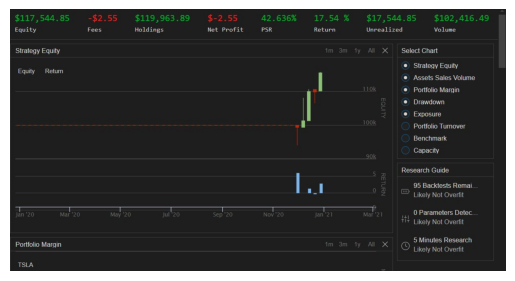

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "C:/Users/meets/QUANT/CODE/QUANTCONNECT/ADXSMA.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()